<b> <h1>PROJET DE RECHERCHE</h1></b>


In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [50]:
a = pd.read_csv('avis.csv')
a.head()

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,63C6726EA81F3E3016AF9A56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8,"""https://www.trictrac.net/avis/vraiment-bon-12...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,63C6726EA81F3E3016AF9A57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7,"""https://www.trictrac.net/avis/le-festival-de-...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,Comment continuer après un mega hit ? Simpleme...
2,63C6726EA81F3E3016AF9A58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7,"""https://www.trictrac.net/avis/vivez-la-migrat...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,63C6726EA81F3E3016AF9A59,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8,NaN,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,NaN
4,63C6726EA81F3E3016AF9A5A,prunelles,2021-05-24 12:43:18,Envolez-moi,9,"""https://www.trictrac.net/avis/envolez-moi""",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Très joli bijou que ce jeu-là ! Le matériel, l..."


In [51]:
avis=a.drop(['_id','treated'],axis=1)

In [52]:
avis.head()

,author,date_published,title_review,note,review_href,title,url,comment
0,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8,"""https://www.trictrac.net/avis/vraiment-bon-12...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7,"""https://www.trictrac.net/avis/le-festival-de-...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,Comment continuer après un mega hit ? Simpleme...
2,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7,"""https://www.trictrac.net/avis/vivez-la-migrat...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8,NaN,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,NaN
4,prunelles,2021-05-24 12:43:18,Envolez-moi,9,"""https://www.trictrac.net/avis/envolez-moi""",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Très joli bijou que ce jeu-là ! Le matériel, l..."


<h2>Travail sur les auteurs</h2>

In [53]:
nb_auteurs = avis['author'].value_counts()

nb_auteurs.describe()

count    13623.000000
mean        18.096161
std         62.454982
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max       2194.000000
Name: count, dtype: float64

A vu d'oeil, on voit qu'il y'a en tout 13623 auteurs differents. Un auteur écrit 18 avis en moyenne. L'auteur avec le plus d'avis en a écrit 2194 et on a une variance qui est de 62,45. 
Dans la suite, nous étudions les différentes tranches d'avis pour mieux comprendre la base de données.

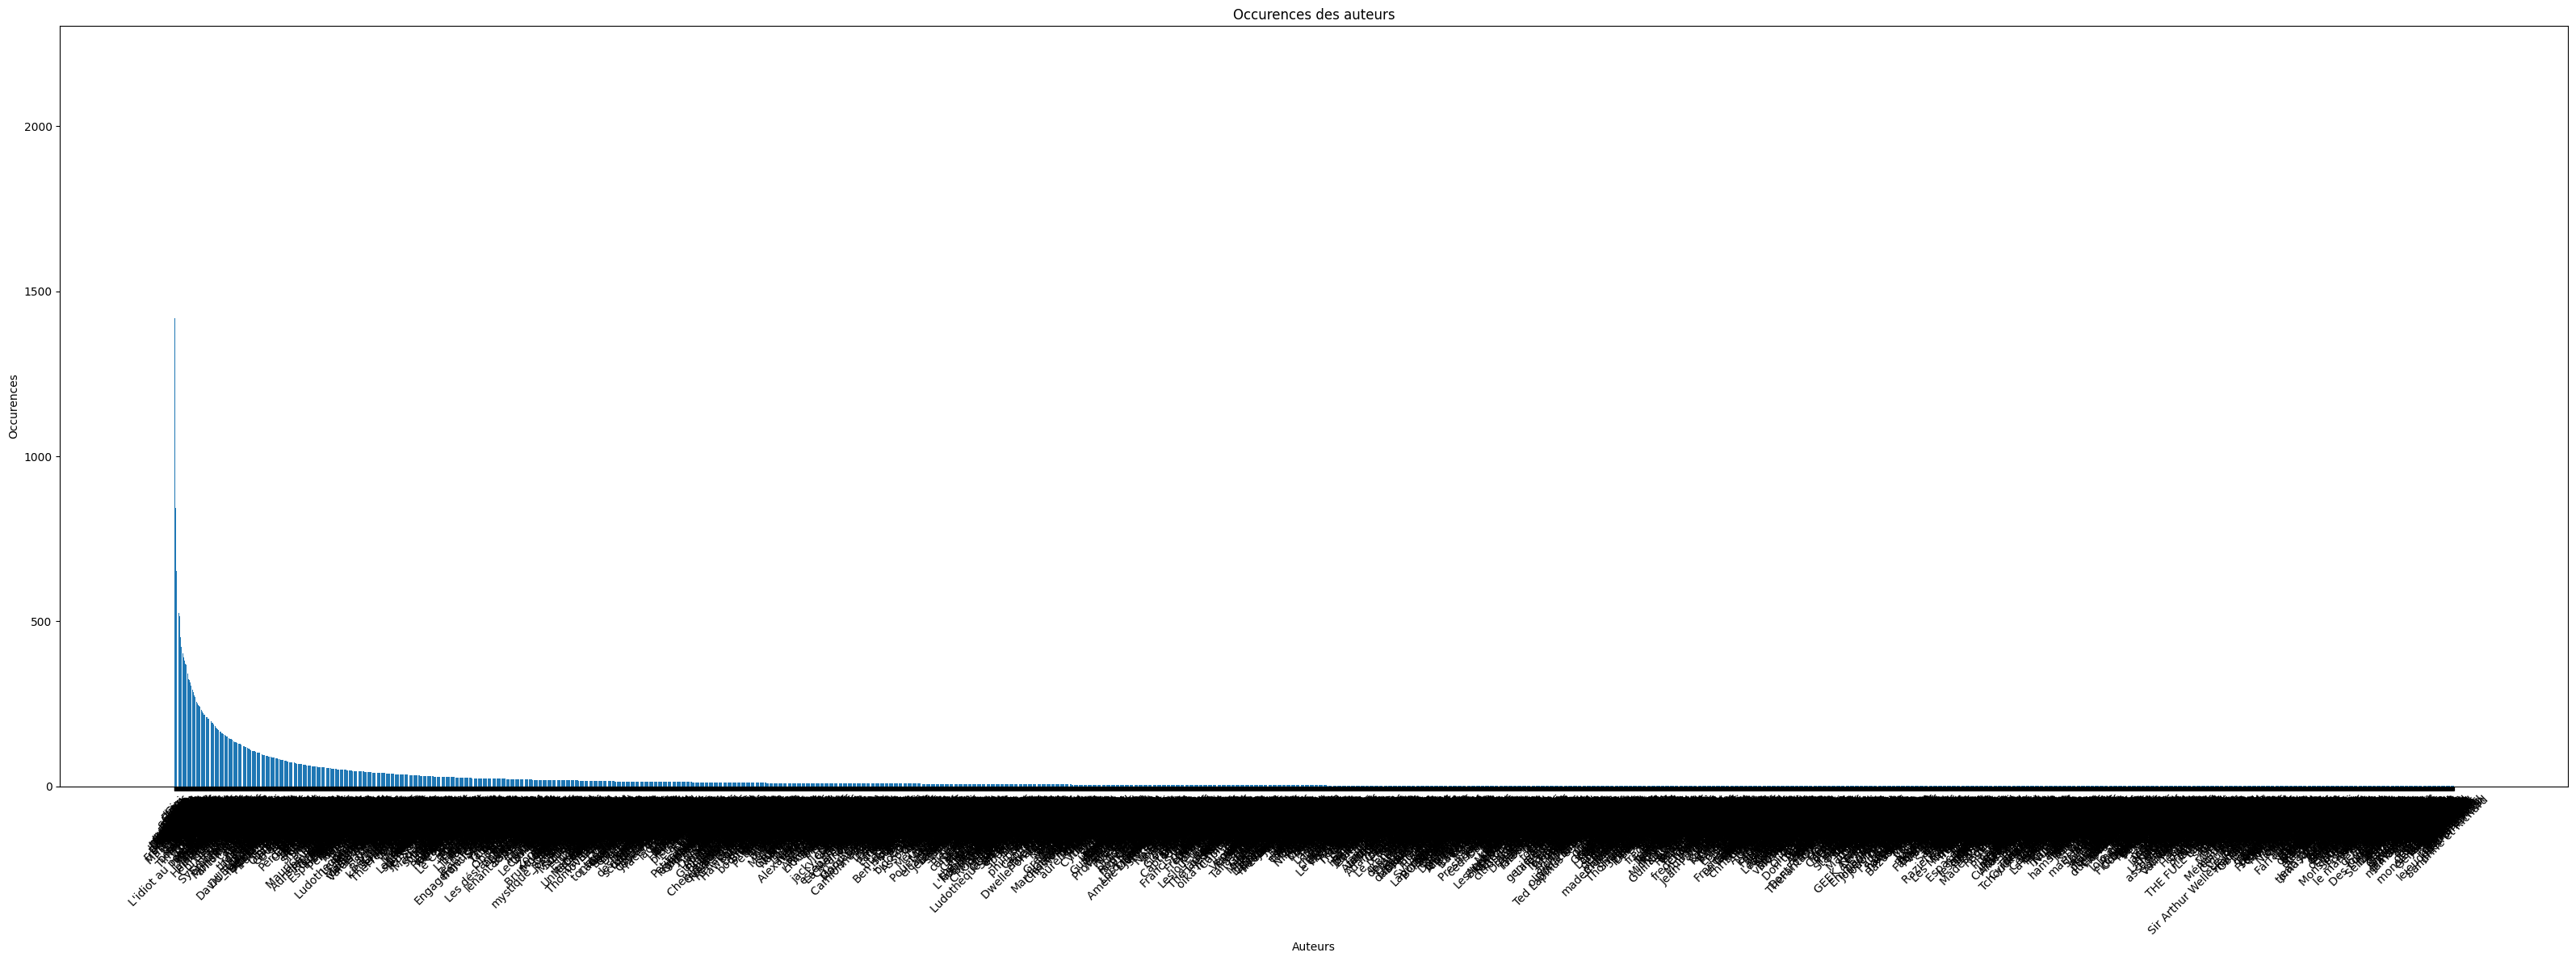

In [54]:
plt.figure(figsize=(32,12))
plt.bar(nb_auteurs.index, nb_auteurs.values)
plt.xlabel('Auteurs')
plt.ylabel('Occurences')
plt.title('Occurences des auteurs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

On remarque bien qu'on ne voit pas grand chose du au fait qu'il y'a énormément d'auteurs (13623). On distingue quand même la forme de la courbe. \n on commence donc par chercher les top 100 auteurs et faire un deuxieme histogramme.

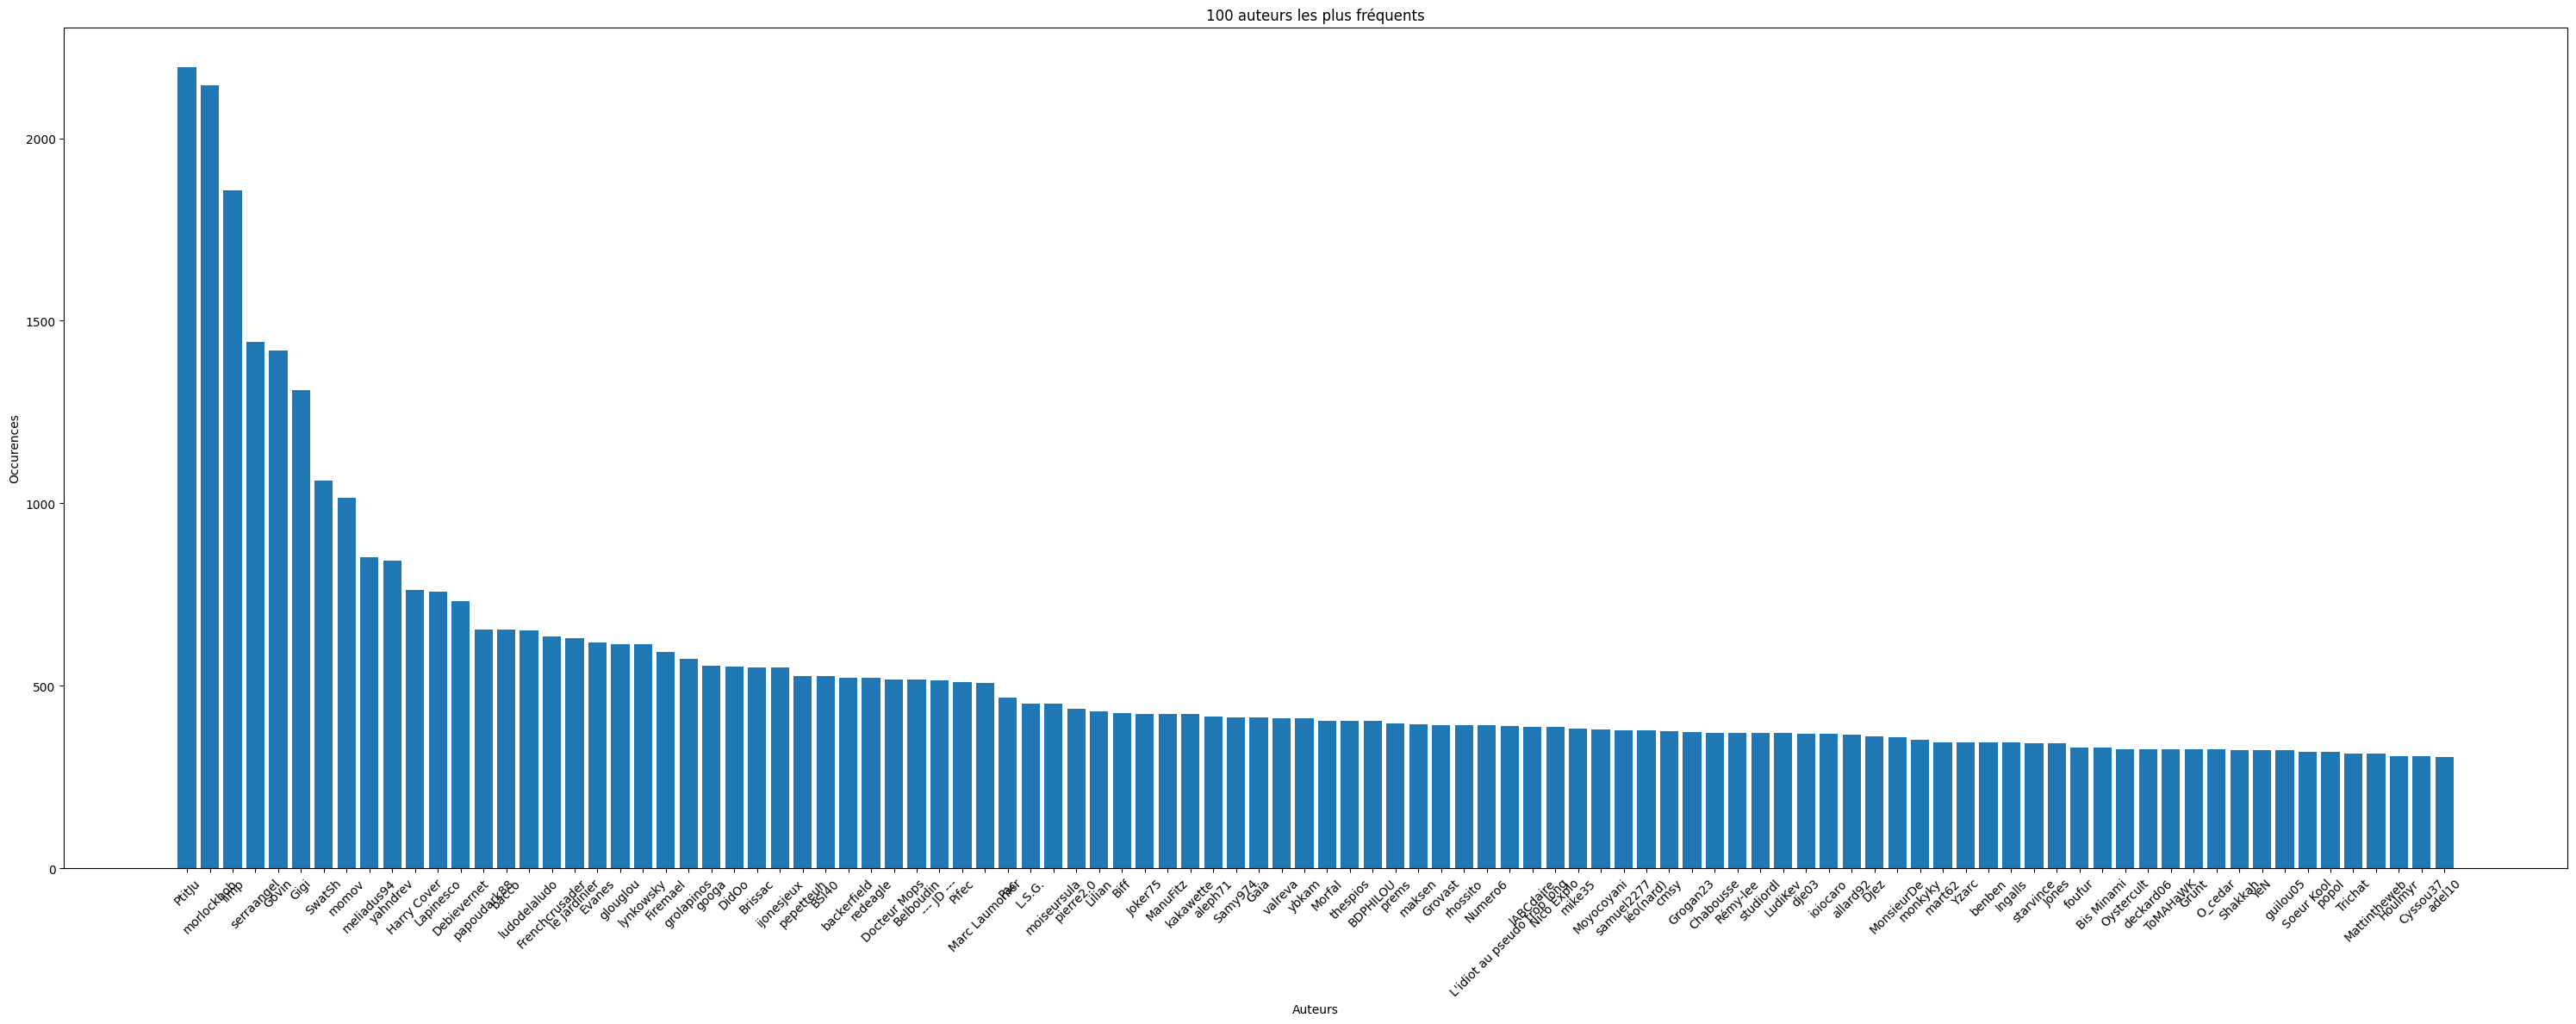

In [55]:
top_100_auteurs = nb_auteurs.head(100)

plt.figure(figsize=(30, 12))  
plt.bar(top_100_auteurs.index, top_100_auteurs.values)
plt.xlabel('Auteurs')
plt.ylabel('Occurences')
plt.title('100 auteurs les plus fréquents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Cet histogramme nous permets de mieux comprendre la distribution par auteurs.

In [56]:
nb_auteurs_1000 = len(nb_auteurs[nb_auteurs > 1000])

pourcentage_1000 = (nb_auteurs_1000/len(nb_auteurs))*100

print("Il n'y'a seulement que %d auteurs qui ont écris plus de 1000 avis" % nb_auteurs_1000)
print("ce qui représente %.2f pourcent de la table" % pourcentage_1000)

Il n'y'a seulement que 8 auteurs qui ont écris plus de 1000 avis
ce qui représente 0.06 pourcent de la table


In [57]:
nb_auteurs_500_1000 = len(nb_auteurs[(nb_auteurs>=500)&(nb_auteurs<=1000)])

pourcentage_500_1000 = (nb_auteurs_500_1000/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écrit entre 500 et 1000 avis " % nb_auteurs_500_1000)
print("ce qui représente %.2f pourcent de la table" % pourcentage_500_1000)

Il y'a 28 auteurs qui ont écrit entre 500 et 1000 avis 
ce qui représente 0.21 pourcent de la table


In [58]:
nb_auteurs_500 = len(nb_auteurs[(nb_auteurs<500)])

pourcentage_500 = (nb_auteurs_500/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écrit moins de 500 avis" % nb_auteurs_500)
print("ce qui représente %.2f pourcent de la table" % pourcentage_500)

Il y'a 13587 auteurs qui ont écrit moins de 500 avis
ce qui représente 99.74 pourcent de la table


On remarque donc que la plus grande majorité des auteurs écrivent moins de 500 commentaires.

In [59]:
nb_auteurs_500_100 = len(nb_auteurs[(nb_auteurs<500) & (nb_auteurs>=100)])

pourcentage_500_100 = (nb_auteurs_500_100/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écris entre 500 et 100 avis" % nb_auteurs_500_100)
print("ce qui représente %.2f pourcent de la table" % pourcentage_500_100)

Il y'a 479 auteurs qui ont écris entre 500 et 100 avis
ce qui représente 3.52 pourcent de la table


On en conclut donc que la plupart des utilisateurs écrivent moins de 100 avis

In [60]:
nb_auteurs_50 = len(nb_auteurs[(nb_auteurs < 100) & (nb_auteurs >= 50)])

pourcentage_50 = (nb_auteurs_50/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écris entre 50 et 100 avis" % nb_auteurs_50)
print("ce qui répresente %.2f pourcent de la table" % pourcentage_50)

Il y'a 513 auteurs qui ont écris entre 50 et 100 avis
ce qui répresente 3.77 pourcent de la table


In [61]:
nb_auteurs_20 = len(nb_auteurs[(nb_auteurs<20) & (nb_auteurs>=1)])

pourcentage_20 = (nb_auteurs_20/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écris entre 20 et 1 avis" % nb_auteurs_20)
print("ce qui représente %.2f pourcent de la table" % pourcentage_20)

Il y'a 11394 auteurs qui ont écris entre 20 et 1 avis
ce qui représente 83.64 pourcent de la table


Suite à toutes ces statistiques, on remarque qu'environ <b>$80%$</b> des utilisateurs écrivent entre 20 et 1 avis, ce qui est assez peu. On suppopsera donc dans la suite de mettre un threshold à ce niveau la.

<h2>Travail sur les jeux</h2>

In [62]:
nb_jeux = avis['title'].value_counts()
nb_jeux

title
MicroMacro Crime City                           750
Top Ten                                         696
The Crew                                        450
It's a Wonderful World                          450
Talisman - 4e Édition Révisée                   450
                                               ... 
Biz bluff                                         1
Qui mange quoi ?                                  1
Ars Mysteriorum                                   1
Rorschach                                         1
Warhammer - Invasion : L'Eclipse de l'Espoir      1
Name: count, Length: 10709, dtype: int64

In [63]:
nb_jeux.describe()

count    10709.000000
mean        23.020263
std         49.265167
min          1.000000
25%          2.000000
50%          5.000000
75%         18.000000
max        750.000000
Name: count, dtype: float64

A coup d'oeil on voit qu'il y'a 10709 jeux en tout et que la moyenne d'avis par jeu est de 23.

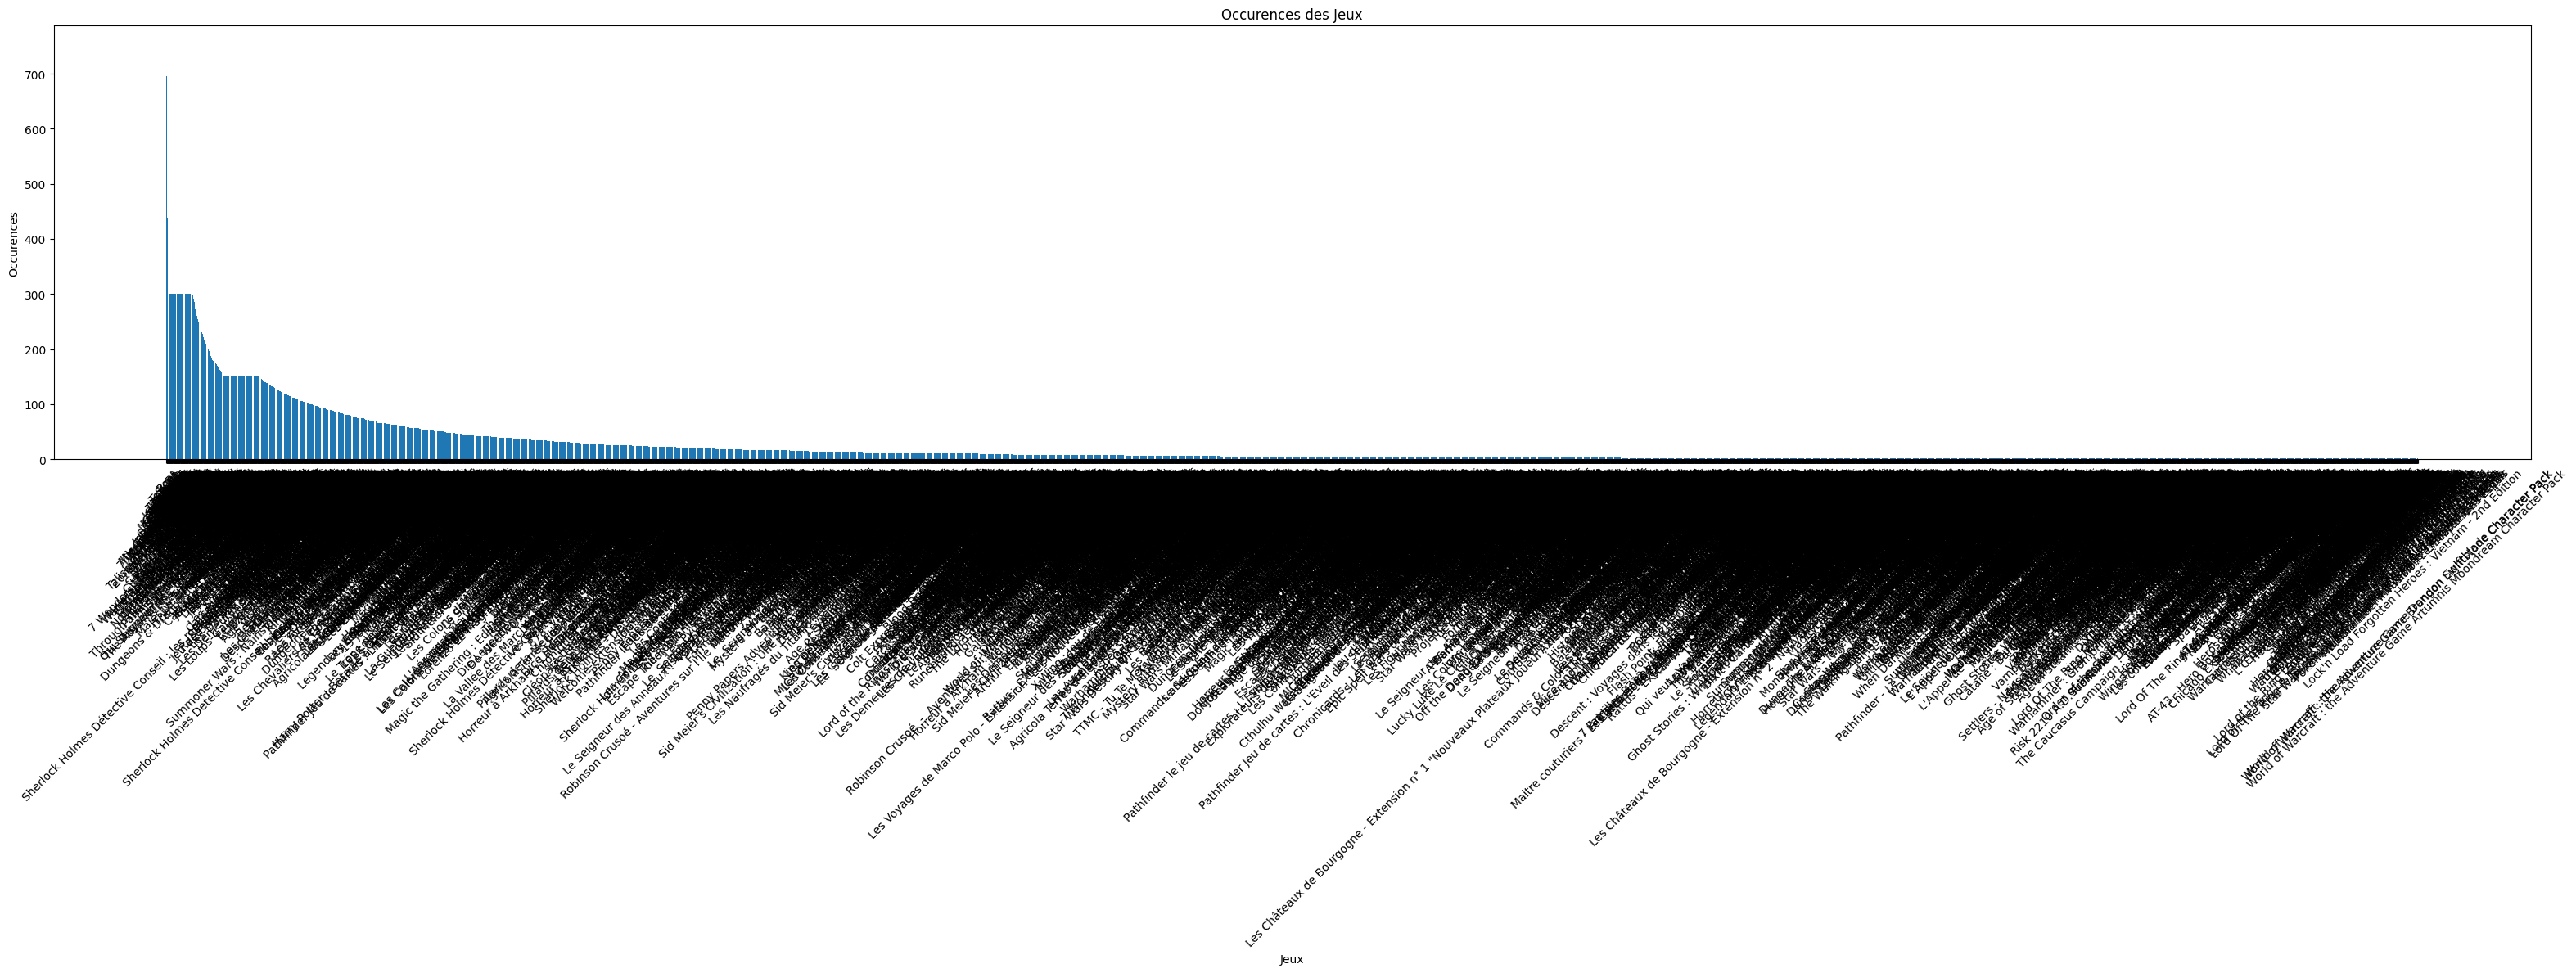

In [64]:
plt.figure(figsize=(32,12))
plt.bar(nb_jeux.index, nb_jeux.values)
plt.xlabel('Jeux')
plt.ylabel('Occurences')
plt.title('Occurences des Jeux')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Même problème que pour les auteurs, on prends le top 100 des jeux.

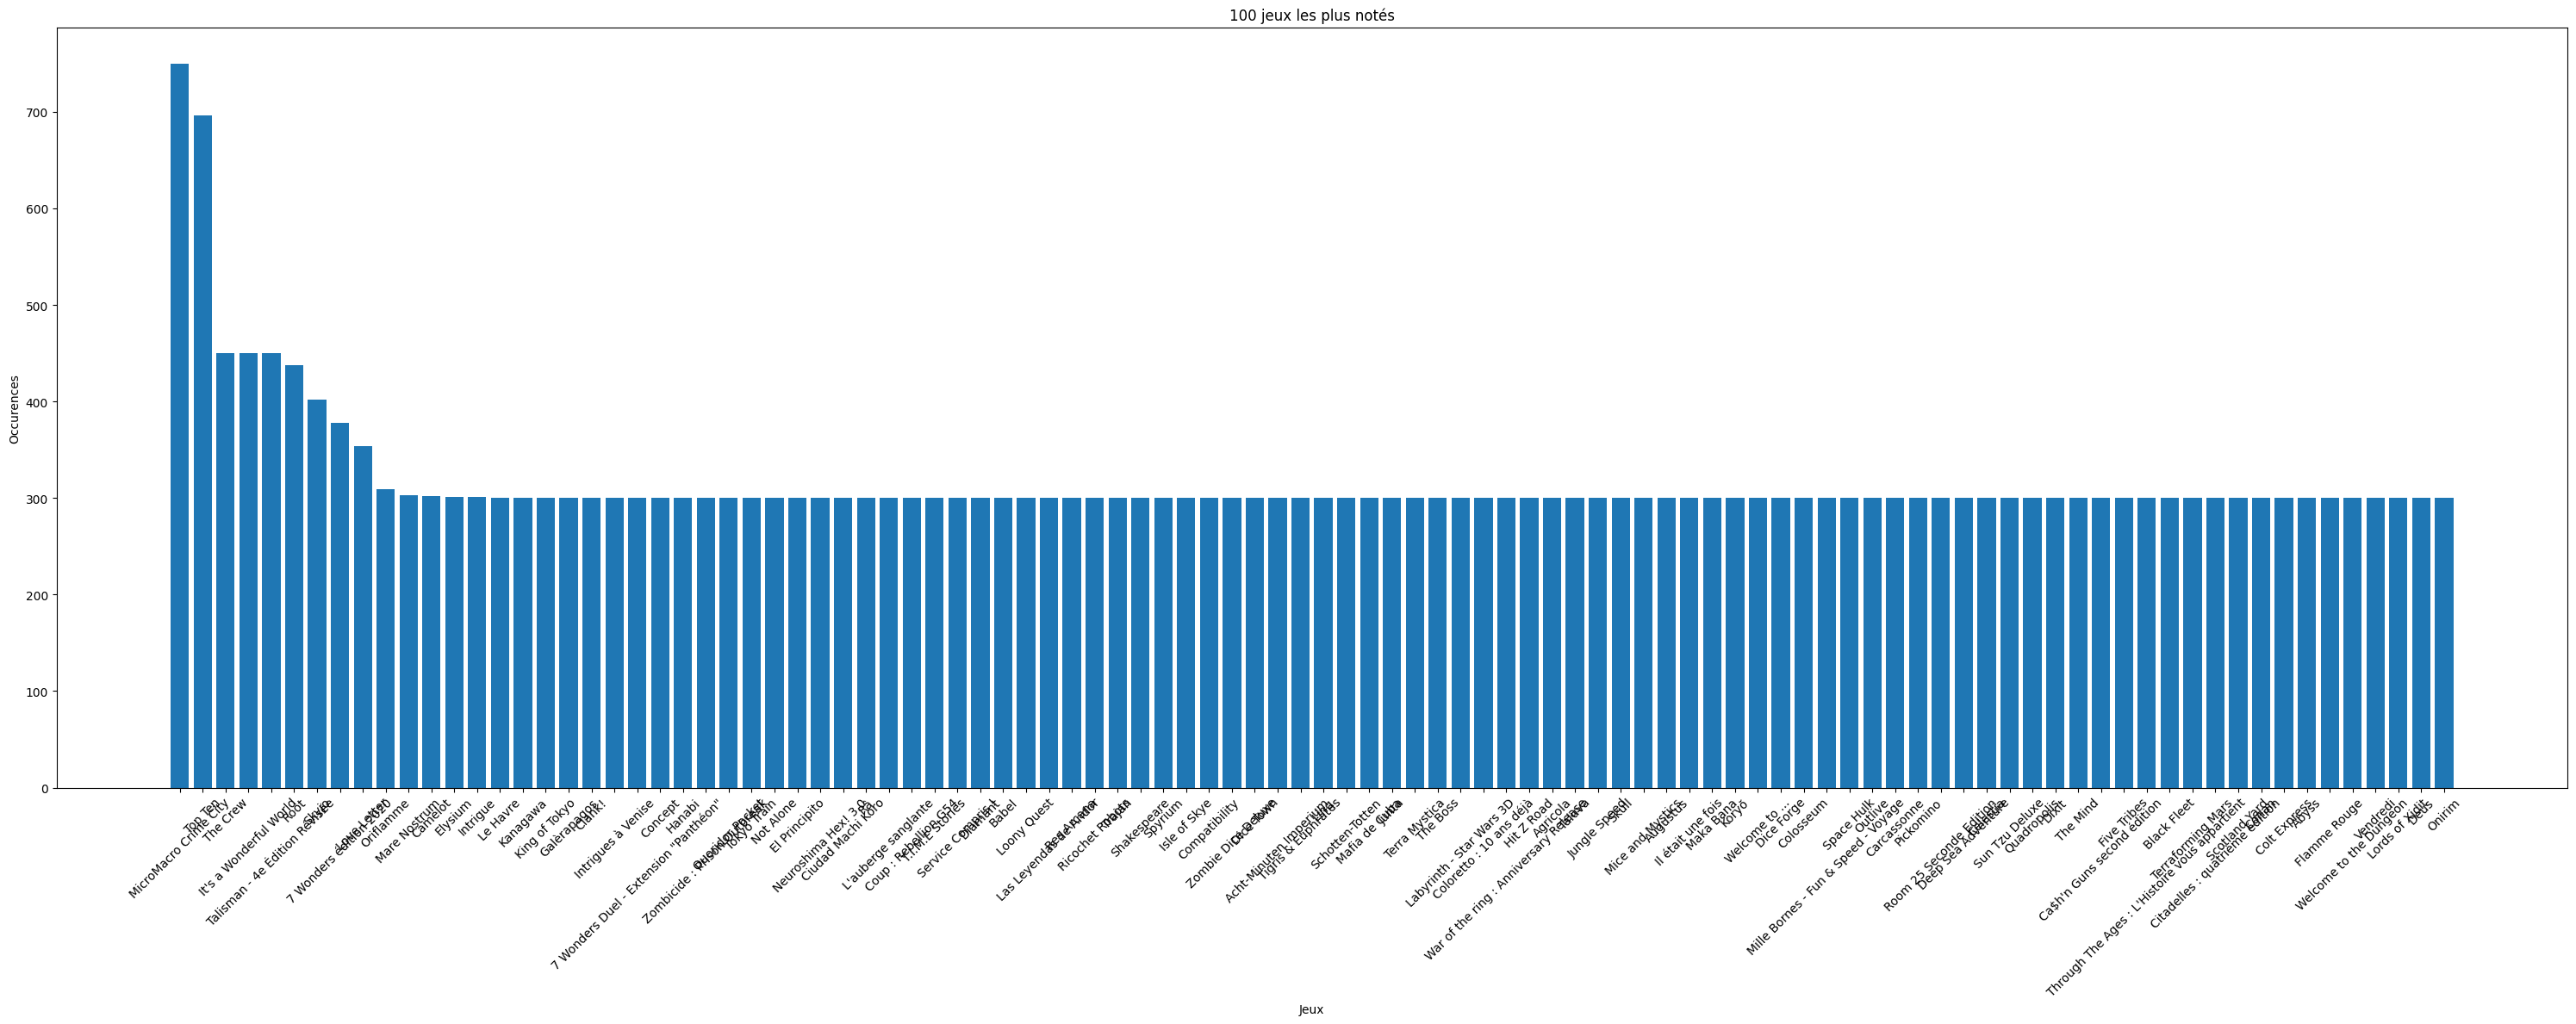

In [65]:
top_100_jeux = nb_jeux.head(100)

plt.figure(figsize=(30, 12))  
plt.bar(top_100_jeux.index, top_100_jeux.values)
plt.xlabel('Jeux')
plt.ylabel('Occurences')
plt.title('100 jeux les plus notés')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

A premier coup d'oeil, on peut remarquer qu'il y'a énormément de jeux qui sont cités autour des 300 fois, on va donc suivre et entreprendre la même démarche que pour les auteurs.

In [66]:
nb_jeux_pg_300 = len(nb_jeux[nb_jeux > 300])

pourcentage_jeux_pg_300 = (nb_jeux_pg_300/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent plus de 300 fois" % nb_jeux_pg_300)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_pg_300)

Il y'a 14 nb jeux qui apparaissent plus de 300 fois
Ce qui représente 0.13 pourcent de la table jeux


In [73]:
nb_jeux_300 = len(nb_jeux[nb_jeux == 300])

pourcentage_jeux_300 = (nb_jeux_300/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent exactement 300 fois" % nb_jeux_300)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_300)

Il y'a 111 nb jeux qui apparaissent exactement 300 fois
Ce qui représente 1.04 pourcent de la table jeux


In [68]:
nb_jeux_pp_300 = len(nb_jeux[nb_jeux < 300])

pourcentage_jeux_pp_300 = (nb_jeux_pp_300/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent 300 fois" % nb_jeux_pp_300)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_pp_300)

Il y'a 10584 nb jeux qui apparaissent 300 fois
Ce qui représente 98.83 pourcent de la table jeux


In [69]:
nb_jeux_300_100 = len(nb_jeux[(nb_jeux < 300) & (nb_jeux >= 100)])

pourcentage_jeux_300_100 = (nb_jeux_300_100/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent entre 100 et 300 fois" % nb_jeux_300_100)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_300_100)

Il y'a 563 nb jeux qui apparaissent entre 100 et 300 fois
Ce qui représente 5.26 pourcent de la table jeux


In [70]:
nb_jeux_100 = len(nb_jeux[nb_jeux < 100])

pourcentage_jeux_100 = (nb_jeux_100/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent moins de 100 fois" % nb_jeux_100)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_100)

Il y'a 10021 nb jeux qui apparaissent moins de 100 fois
Ce qui représente 93.58 pourcent de la table jeux


In [71]:
nb_jeux_100_50 = len(nb_jeux[(nb_jeux < 100) & (nb_jeux >= 50)])

pourcentage_jeux_100_50 = (nb_jeux_100_50/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent moins de 100 fois" % nb_jeux_100_50)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_100_50)

Il y'a 636 nb jeux qui apparaissent moins de 100 fois
Ce qui représente 5.94 pourcent de la table jeux


In [72]:
nb_jeux_50 = len(nb_jeux[nb_jeux < 50])

pourcentage_jeux_50 = (nb_jeux_50/len(nb_jeux))*100

print("Il y'a %d nb jeux qui apparaissent moins de 50 fois" % nb_jeux_50)
print("Ce qui représente %.2f pourcent de la table jeux" % pourcentage_jeux_50)

Il y'a 9385 nb jeux qui apparaissent moins de 50 fois
Ce qui représente 87.64 pourcent de la table jeux


On en conclut donc que la plus grande majorité des jeux ont moins de 50 avis